In [112]:
!pip install yfinance

In [113]:
import yfinance as yf
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error,mean_absolute_percentage_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

In [114]:
start = datetime.datetime(2022,11,25)
end = datetime.datetime(2023,11,25)
ws = yf.download('MRF.NS',start,end)
ws['SMA30'] = ws['Close'].rolling(30).mean()

[*********************100%%**********************]  1 of 1 completed


In [115]:
ws.head()

,Open,High,Low,Close,Adj Close,Volume,SMA30
Date,,,,,,,
2022-11-25,89365.0,90388.000000,89001.000000,89904.601562,89751.234375,9260,NaN
2022-11-28,90000.0,91969.000000,89930.046875,91533.796875,91377.648438,13196,NaN
2022-11-29,92000.0,92800.000000,91900.046875,92565.148438,92407.234375,11792,NaN
2022-11-30,92800.0,94103.453125,92269.000000,93557.546875,93397.937500,17300,NaN
2022-12-01,94000.0,95151.203125,93234.601562,94325.500000,94164.585938,16380,NaN


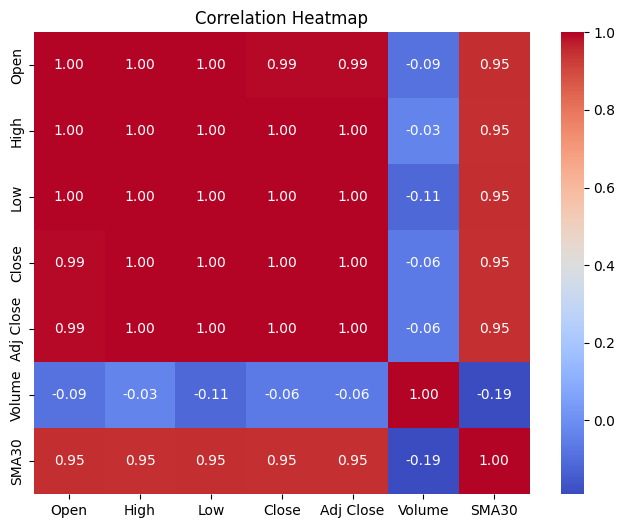

In [116]:
# Calculate the correlation matrix
correlation_matrix = ws.corr()
# Create a heatmap
plt.figure(figsize=(8, 6))  # Optional: Set the figure size
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")  # Optional: Set the title
# Display the heatmap
plt.show()

In [117]:

ws['Close'] = ws['Close'].round(2)
date = ws.index
ws['Underlying Log Returns (C)'] = np.log(ws['Close'] / ws['Close'].shift(1))
ws['Underlying Log Returns (C)'] = ws['Underlying Log Returns (C)'].round(4)
ws.index = range(len(ws))
ws.loc[0,'Previous Day Underlying Volatility (D)'] = 0.0178

index=1
print(ws.at[0, 'Previous Day Underlying Volatility (D)'])
print(ws.at[index-1,'Previous Day Underlying Volatility (D)'])
print(ws.at[1, 'Underlying Log Returns (C)'])

# Calculate 'Current Day Underlying Daily Volatility (E)' iteratively
for index in range(1, len(ws)):  # Start from index + 1
          # For the first row, the formula uses the initial 'Previous Day Underlying Volatility (D)'
          ws.at[index, 'Current Day Underlying Daily Volatility (E)'] = np.sqrt(0.995 * ws.at[index-1,'Previous Day Underlying Volatility (D)'] ** 2 + 0.005 * ws.at[index,'Underlying Log Returns (C)'] ** 2)
          # ws['Current Day Underlying Daily Volatility (E)'] = ws['Current Day Underlying Daily Volatility (E)'].round(4)
          ws.at[index, 'Previous Day Underlying Volatility (D)'] = ws.at[index, 'Current Day Underlying Daily Volatility (E)']
# Assuming df is your DataFrame
#ws = ws.drop(ws.index[-1])
ws.index=date
ws['Current Day Underlying Daily Volatility (E)'] = ws['Current Day Underlying Daily Volatility (E)']
ws = ws.iloc[1:]

0.0178
0.0178
0.018


In [118]:
ws.tail()

,Open,High,Low,Close,Adj Close,Volume,SMA30,Underlying Log Returns (C),Previous Day Underlying Volatility (D),Current Day Underlying Daily Volatility (E)
Date,,,,,,,,,,
2023-11-20,111339.000000,111600.000000,110649.953125,111390.95,111390.953125,4443,108786.933594,-0.0008,0.013251,0.013251
2023-11-21,111400.000000,111749.953125,110882.703125,111434.30,111434.296875,2888,108916.401823,0.0004,0.013218,0.013218
2023-11-22,111002.101562,111785.953125,110617.546875,111197.75,111197.750000,3222,109047.428385,-0.0021,0.013186,0.013186
2023-11-23,111200.000000,111999.953125,111118.000000,111378.70,111378.703125,1854,109186.581771,0.0016,0.013154,0.013154
2023-11-24,111000.000000,111550.000000,110768.148438,111448.20,111448.203125,2854,109310.250260,0.0006,0.013121,0.013121


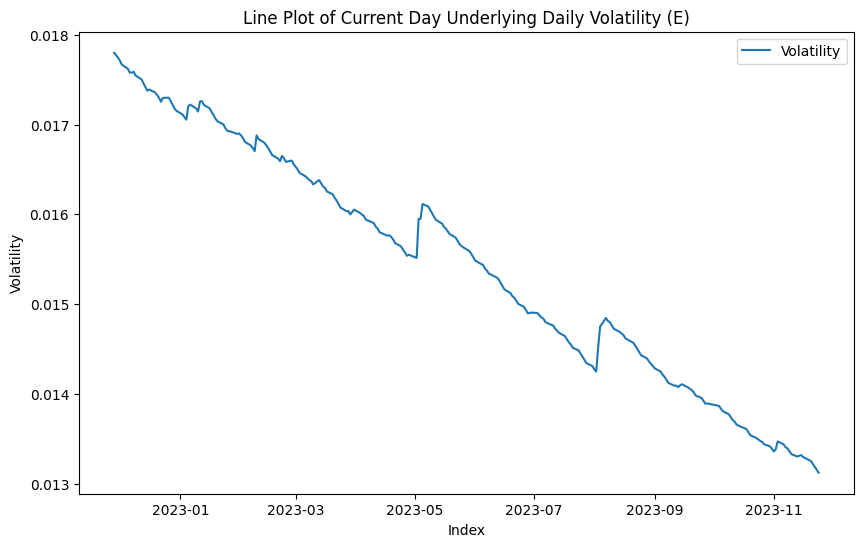

In [119]:
# Assuming you have your DataFrame 'ws' with the relevant data
# Create a line plot of 'Current Day Underlying Daily Volatility (E)'
plt.figure(figsize=(10, 6))  # Optional: Set the figure size
plt.plot(ws.index, ws['Current Day Underlying Daily Volatility (E)'], label='Volatility')
plt.xlabel('Index')  # Optional: Set the x-axis label
plt.ylabel('Volatility')  # Optional: Set the y-axis label
plt.title('Line Plot of Current Day Underlying Daily Volatility (E)')  # Optional: Set the title
plt.legend()  # Optional: Show the legend

# Display the plot
plt.show()


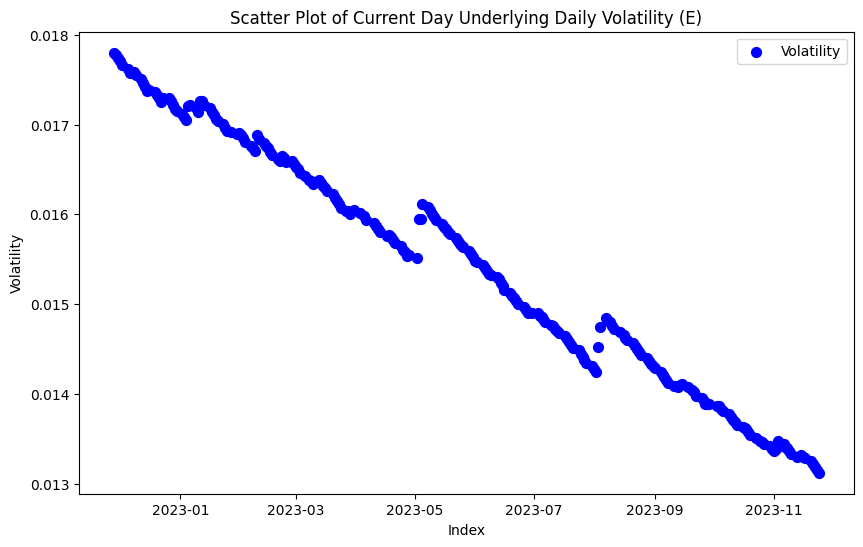

In [120]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have your DataFrame 'ws' with the relevant data

# Create a scatter plot of 'Current Day Underlying Daily Volatility (E)'
plt.figure(figsize=(10, 6))  # Optional: Set the figure size
plt.scatter(ws.index, ws['Current Day Underlying Daily Volatility (E)'], label='Volatility', marker='o', s=50, c='blue')
plt.xlabel('Index')  # Optional: Set the x-axis label
plt.ylabel('Volatility')  # Optional: Set the y-axis label
plt.title('Scatter Plot of Current Day Underlying Daily Volatility (E)')  # Optional: Set the title
plt.legend()  # Optional: Show the legend
# Display the plot
plt.show()

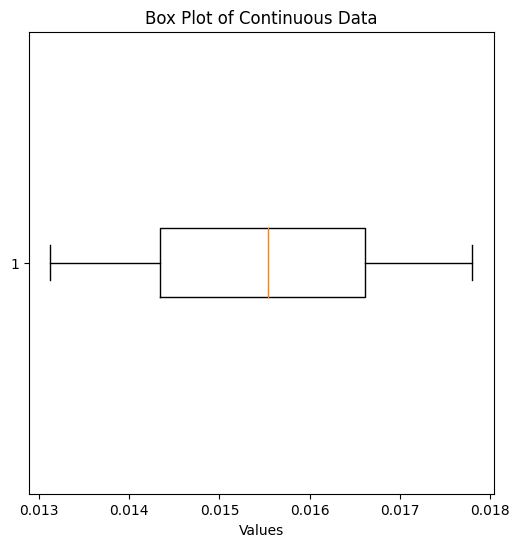

In [121]:
# Create a box plot
plt.figure(figsize=(6, 6))  # Optional: Set the figure size
plt.boxplot(ws['Current Day Underlying Daily Volatility (E)'], vert=False)  # Create a horizontal box plot (vert=False)
plt.xlabel('Values')  # Optional: Set the x-axis label
plt.title('Box Plot of Continuous Data')  # Optional: Set the title
# Display the plot
plt.show()

<ipython-input-122-065e43bdf794>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(ws['Current Day Underlying Daily Volatility (E)'], shade=True)  # Create a density plot with shading


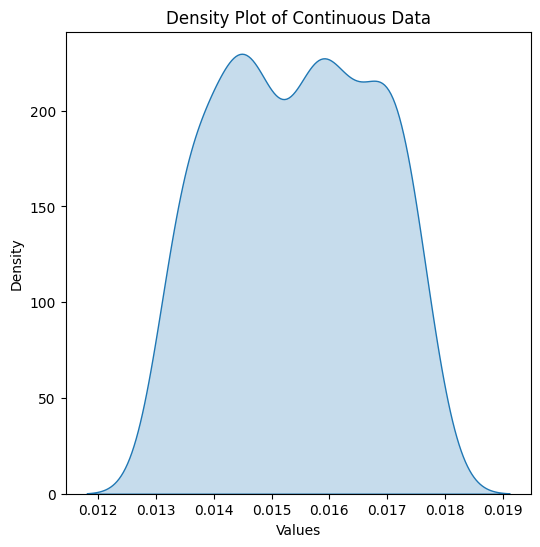

In [122]:
# Create a density plot (Kernel Density Estimation)
plt.figure(figsize=(6, 6))  # Optional: Set the figure size
sns.kdeplot(ws['Current Day Underlying Daily Volatility (E)'], shade=True)  # Create a density plot with shading
plt.xlabel('Values')  # Optional: Set the x-axis label
plt.ylabel('Density')  # Optional: Set the y-axis label
plt.title('Density Plot of Continuous Data')  # Optional: Set the title
# Display the plot
plt.show()

In [123]:
ws.head()

,Open,High,Low,Close,Adj Close,Volume,SMA30,Underlying Log Returns (C),Previous Day Underlying Volatility (D),Current Day Underlying Daily Volatility (E)
Date,,,,,,,,,,
2022-11-28,90000.0,91969.000000,89930.046875,91533.80,91377.648438,13196,NaN,0.0180,0.017801,0.017801
2022-11-29,92000.0,92800.000000,91900.046875,92565.15,92407.234375,11792,NaN,0.0112,0.017774,0.017774
2022-11-30,92800.0,94103.453125,92269.000000,93557.55,93397.937500,17300,NaN,0.0107,0.017746,0.017746
2022-12-01,94000.0,95151.203125,93234.601562,94325.50,94164.585938,16380,NaN,0.0082,0.017711,0.017711
2022-12-02,94490.0,94988.000000,93234.000000,94554.20,94392.898438,11977,NaN,0.0024,0.017667,0.017667


In [124]:
x = ws[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume','Underlying Log Returns (C)',	'Previous Day Underlying Volatility (D)']]
y = ws['Current Day Underlying Daily Volatility (E)']

In [125]:
last_x = x.iloc[-5:]
last_y = y.iloc[-5:]
x = x.iloc[:-5]
y = y.iloc[:-5]

In [126]:
last_x

,Open,High,Low,Close,Adj Close,Volume,Underlying Log Returns (C),Previous Day Underlying Volatility (D)
Date,,,,,,,,
2023-11-20,111339.000000,111600.000000,110649.953125,111390.95,111390.953125,4443,-0.0008,0.013251
2023-11-21,111400.000000,111749.953125,110882.703125,111434.30,111434.296875,2888,0.0004,0.013218
2023-11-22,111002.101562,111785.953125,110617.546875,111197.75,111197.750000,3222,-0.0021,0.013186
2023-11-23,111200.000000,111999.953125,111118.000000,111378.70,111378.703125,1854,0.0016,0.013154
2023-11-24,111000.000000,111550.000000,110768.148438,111448.20,111448.203125,2854,0.0006,0.013121


In [127]:
last_y

Date
2023-11-20    0.013251
2023-11-21    0.013218
2023-11-22    0.013186
2023-11-23    0.013154
2023-11-24    0.013121
Name: Current Day Underlying Daily Volatility (E), dtype: float64

In [128]:
x

,Open,High,Low,Close,Adj Close,Volume,Underlying Log Returns (C),Previous Day Underlying Volatility (D)
Date,,,,,,,,
2022-11-28,90000.0,91969.000000,89930.046875,91533.80,91377.648438,13196,0.0180,0.017801
2022-11-29,92000.0,92800.000000,91900.046875,92565.15,92407.234375,11792,0.0112,0.017774
2022-11-30,92800.0,94103.453125,92269.000000,93557.55,93397.937500,17300,0.0107,0.017746
2022-12-01,94000.0,95151.203125,93234.601562,94325.50,94164.585938,16380,0.0082,0.017711
2022-12-02,94490.0,94988.000000,93234.000000,94554.20,94392.898438,11977,0.0024,0.017667
...,...,...,...,...,...,...,...,...
2023-11-10,108299.0,108479.898438,107338.101562,108295.70,108292.757812,3311,0.0020,0.013328
2023-11-13,108500.0,108500.000000,107033.046875,107637.60,107634.679688,6671,-0.0061,0.013301
2023-11-15,108299.0,109510.453125,107812.601562,109379.50,109376.523438,6906,0.0161,0.013317


In [129]:
x.shape

(242, 8)

In [130]:

y.shape

(242,)

Polynomial regression

In [131]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=100)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)
# x_train=x_train.to_numpy().reshape(-1,1)
# print(x_train.shape)

(193, 8)
(49, 8)
(193,)
(49,)


In [132]:
x_test.dtypes

Open                                      float64
High                                      float64
Low                                       float64
Close                                     float64
Adj Close                                 float64
Volume                                      int64
Underlying Log Returns (C)                float64
Previous Day Underlying Volatility (D)    float64
dtype: object

In [133]:
x_test.head()

,Open,High,Low,Close,Adj Close,Volume,Underlying Log Returns (C),Previous Day Underlying Volatility (D)
Date,,,,,,,,
2023-02-28,85565.0,85898.203125,84640.000000,85256.60,85114.015625,9473,0.0013,0.016558
2023-02-20,89000.0,90000.000000,88717.101562,89181.10,89028.960938,5810,0.0050,0.016622
2023-09-01,109500.0,109500.000000,107559.046875,107984.15,107981.210938,6574,-0.0065,0.014284
2023-10-06,107000.0,108000.000000,107000.000000,107550.25,107547.328125,3580,0.0073,0.013805
2023-05-10,98200.0,98200.000000,96575.046875,97229.35,97066.742188,9964,-0.0028,0.016009


In [134]:
poly = PolynomialFeatures(degree=8)#on degree 1 it gives exact values on 2 less accurate and 3 may be a sort of best fit to the algorithm
X_poly = poly.fit_transform(x_train)
X_poly_test = poly.fit_transform(x_test)
X_poly_testf = poly.fit_transform(last_x)
poly.fit(X_poly,y_train)
lin2=LinearRegression()
lin2.fit(X_poly,y_train)

LinearRegression()

In [135]:
y_pred=lin2.predict(X_poly_test)
mse = mean_squared_error(y_test, y_pred)
mae=mean_absolute_error(y_test,y_pred)
mape=mean_absolute_percentage_error(y_test,y_pred)
print("Mean Squared Error:", mse)
print("Mean aboslute Error:", mae)
print("Mean absolute percentage Error:", mape)

Mean Squared Error: 4.461451715412764
Mean aboslute Error: 0.3127859355815966
Mean absolute percentage Error: 21.219987918297875


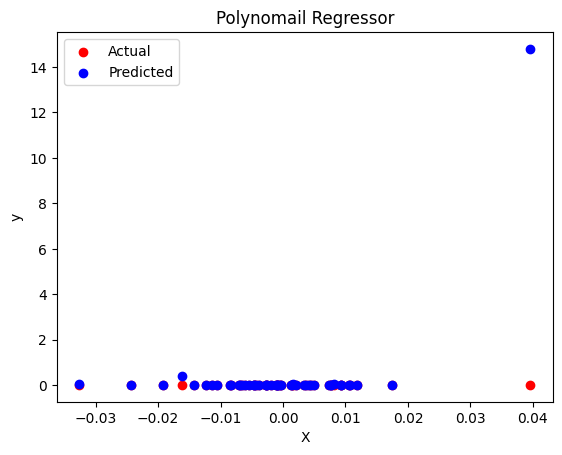

In [136]:
xtes=x_test['Underlying Log Returns (C)']
plt.scatter(xtes, y_test, color='red', label='Actual')
plt.scatter(xtes, y_pred, color='blue', label='Predicted')
plt.title('Polynomail Regressor')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

In [137]:
print(y_pred[:10])


[0.01612497 0.01629801 0.01371244 0.01300426 0.01902503 0.01186822
 0.01759433 0.01450284 0.01849201 0.01607571]


In [138]:
print(x_test[:10])

                     Open           High            Low      Close  \
Date                                                                 
2023-02-28   85565.000000   85898.203125   84640.000000   85256.60   
2023-02-20   89000.000000   90000.000000   88717.101562   89181.10   
2023-09-01  109500.000000  109500.000000  107559.046875  107984.15   
2023-10-06  107000.000000  108000.000000  107000.000000  107550.25   
2023-05-10   98200.000000   98200.000000   96575.046875   97229.35   
2023-11-13  108500.000000  108500.000000  107033.046875  107637.60   
2023-07-05   99600.000000  100300.000000   99099.000000  100191.20   
2023-10-05  107300.000000  107820.000000  106583.046875  106770.50   
2023-11-02  109500.203125  110800.000000  108925.000000  110500.05   
2023-03-27   83878.000000   84549.898438   83416.953125   83709.75   

                Adj Close  Volume  Underlying Log Returns (C)  \
Date                                                            
2023-02-28   85114.015625    

In [139]:
y_pred=lin2.predict(X_poly_testf)
print(y_pred.round(4))

[0.0151 0.0193 0.0185 0.0226 0.0187]


2.KNN Regressor

Mean Squared Error: 1.2952757751519582e-07
Mean aboslute Error: 0.0002716308596517057
Mean absolute percentage Error: 0.017988130619168482


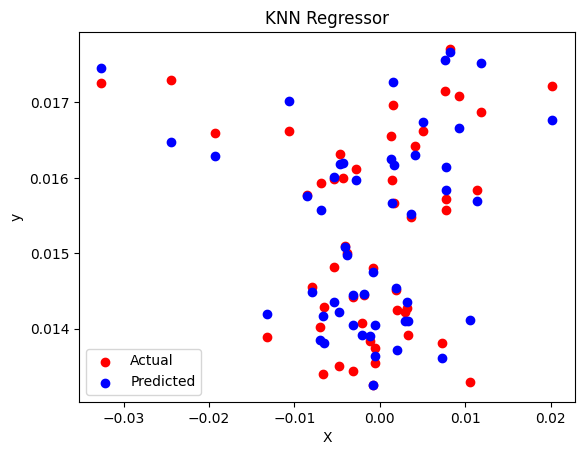

In [140]:
# Import necessary libraries
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
x = ws[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume','Underlying Log Returns (C)',	'Previous Day Underlying Volatility (D)']]
y = ws['Current Day Underlying Daily Volatility (E)']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)

# Create KNN regressor object
knn_regressor = KNeighborsRegressor(n_neighbors=5)

# Fit the model on the training data
knn_regressor.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae=mean_absolute_error(y_test,y_pred)
mape=mean_absolute_percentage_error(y_test,y_pred)
print("Mean Squared Error:", mse)
print("Mean aboslute Error:", mae)
print("Mean absolute percentage Error:", mape)
xtes=X_test['Underlying Log Returns (C)']
# Plot the results
plt.scatter(xtes, y_test, color='red', label='Actual')
plt.scatter(xtes, y_pred, color='blue', label='Predicted')
plt.title('KNN Regressor')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

3.SVM REGRESSOR

Best Hyperparameters: {'kernel': 'linear', 'gamma': 2.8106559866174354, 'epsilon': 1.6534845198053512, 'C': 323.07826095140115}
Mean Squared Error: 1.736382976234549e-06
Mean aboslute Error: 0.0011687200039918462
Mean absolute percentage Error: 0.07811809498727337
Mean Squared Error with Best Hyperparameters: 1.736382976234549e-06


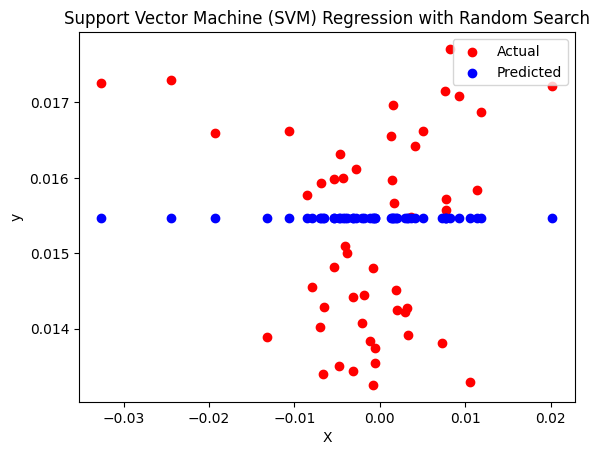

In [141]:
# Import necessary libraries
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

x = ws[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Underlying Log Returns (C)', 'Previous Day Underlying Volatility (D)']]
y = ws['Current Day Underlying Daily Volatility (E)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)

# Define the parameter grid for random search
param_grid = {
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'C': np.random.rand(20) * 1000,
    'gamma': np.random.rand(20) * 10,
    'epsilon': np.random.rand(20) * 2
}

# Create SVR object
svr = SVR()

# Create RandomizedSearchCV object
random_search = RandomizedSearchCV(estimator=svr, param_distributions=param_grid,
                                  scoring='neg_mean_squared_error', cv=5, n_iter=100)

random_search.fit(X_train, y_train)

# Print the best hyperparameters
best_params = random_search.best_params_
print(f'Best Hyperparameters: {best_params}')

# Apply the best hyperparameters to SVR
best_svr = SVR(**best_params)

# Fit the model on the training data with the best hyperparameters
best_svr.fit(X_train, y_train)

# Make predictions on the test data
y_pred = best_svr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae=mean_absolute_error(y_test,y_pred)
mape=mean_absolute_percentage_error(y_test,y_pred)
print("Mean Squared Error:", mse)
print("Mean aboslute Error:", mae)
print("Mean absolute percentage Error:", mape)
print(f'Mean Squared Error with Best Hyperparameters: {mse}')

xtes = X_test['Underlying Log Returns (C)']

# Plot the results
plt.scatter(xtes, y_test, color='red', label='Actual')
plt.scatter(xtes, y_pred, color='blue', label='Predicted')
plt.title('Support Vector Machine (SVM) Regression with Random Search')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()


4.ARIMA (AutoRegressive Integrated Moving Average)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsm

Mean Squared Error: 7.4362618339997625e-06
Mean aboslute Error: 0.001497782101904672
Mean absolute percentage Error: 0.09771983610764962
Mean Squared Error: 7.4362618339997625e-06
(50, 7)
(50,)


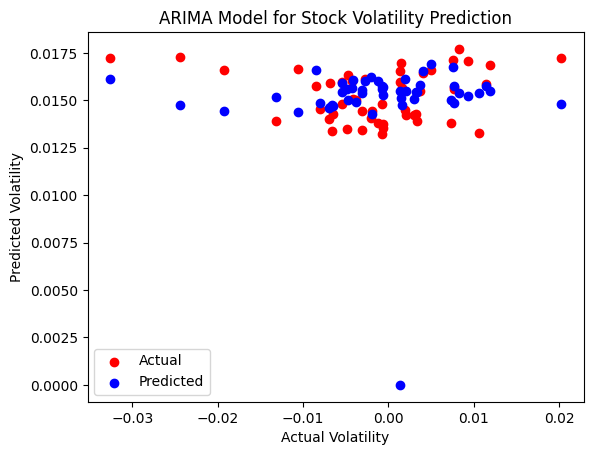

In [142]:
import statsmodels.api as sm

# Prepare the data for ARIMA
x = ws[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Underlying Log Returns (C)']]
y = ws['Current Day Underlying Daily Volatility (E)']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)
# Fit the ARIMA model
arima_model = sm.tsa.arima.ARIMA(y_train, order=(1, 1, 1))
arima_model_fit = arima_model.fit()

# Make predictions on the test data
y_pred = arima_model_fit.predict(start=0, end=len(x_test)-1)
mse = mean_squared_error(y_test, y_pred)
mae=mean_absolute_error(y_test,y_pred)
mape=mean_absolute_percentage_error(y_test,y_pred)
print("Mean Squared Error:", mse)
print("Mean aboslute Error:", mae)
print("Mean absolute percentage Error:", mape)
print("Mean Squared Error:", mse)
print(x_test.shape)
print(y_test.shape)
xtes=x_test['Underlying Log Returns (C)']
# Plot the results
plt.scatter(xtes, y_test, color='red', label='Actual')
plt.scatter(xtes, y_pred, color='blue', label='Predicted')
plt.title('ARIMA Model for Stock Volatility Prediction')
plt.xlabel('Actual Volatility')
plt.ylabel('Predicted Volatility')
plt.legend()
plt.show()


In [143]:
print(y_test.shape)
print(y_pred.shape)

(50,)
(50,)


5.Random forest regressor

Mean Squared Error: 4.975579618178988e-10
Mean aboslute Error: 1.6276783267475773e-05
Mean absolute percentage Error: 0.0010664559714397394


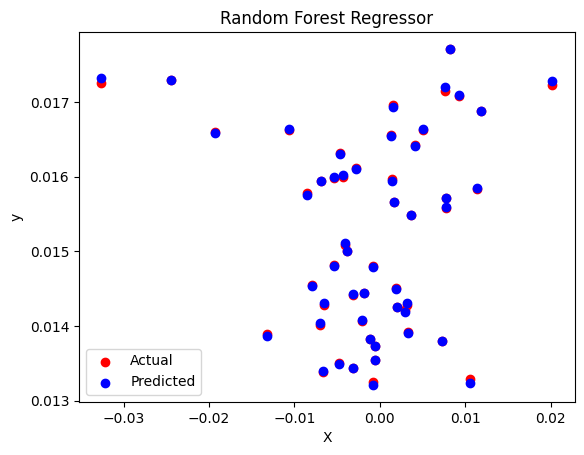

In [144]:
# Import necessary libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
x = ws[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume','Underlying Log Returns (C)', 'Previous Day Underlying Volatility (D)']]
y = ws['Current Day Underlying Daily Volatility (E)']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)

# Create Random Forest Regressor object
rf_regressor = RandomForestRegressor(n_estimators=100)

# Fit the model on the training data
rf_regressor.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae=mean_absolute_error(y_test,y_pred)
mape=mean_absolute_percentage_error(y_test,y_pred)
print("Mean Squared Error:", mse)
print("Mean aboslute Error:", mae)
print("Mean absolute percentage Error:", mape)
xtes=X_test['Underlying Log Returns (C)']
# Plot the results
plt.scatter(xtes, y_test, color='red', label='Actual')
plt.scatter(xtes, y_pred, color='blue', label='Predicted')
plt.title('Random Forest Regressor')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()


6.LSTM

In [145]:
import tensorflow as tf
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Prepare the data
x = ws[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Underlying Log Returns (C)', 'Previous Day Underlying Volatility (D)']]
y = ws['Current Day Underlying Daily Volatility (E)']

# Scale the data
scaler = MinMaxScaler(feature_range=(-1, 1))
scaled_data = scaler.fit_transform(x)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(scaled_data, y, test_size=0.2, random_state=100)

# Create the LSTM model
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    tf.keras.layers.LSTM(32),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32)

# Make predictions on the test data
y_pred = model.predict(X_test)



Epoch 1/100
7/7 [==============================] - 5s 16ms/step - loss: 1.8330e-04
Epoch 2/100
7/7 [==============================] - 0s 16ms/step - loss: 1.0226e-04
Epoch 3/100
7/7 [==============================] - 0s 14ms/step - loss: 4.1944e-05
Epoch 4/100
7/7 [==============================] - 0s 15ms/step - loss: 1.2782e-05
Epoch 5/100
7/7 [==============================] - 0s 26ms/step - loss: 5.9112e-06
Epoch 6/100
7/7 [==============================] - 0s 33ms/step - loss: 7.3322e-06
Epoch 7/100
7/7 [==============================] - 0s 32ms/step - loss: 3.3300e-06
Epoch 8/100
7/7 [==============================] - 0s 30ms/step - loss: 1.4971e-06
Epoch 9/100
7/7 [==============================] - 0s 24ms/step - loss: 6.9155e-07
Epoch 10/100
7/7 [==============================] - 0s 24ms/step - loss: 4.0823e-07
Epoch 11/100
7/7 [==============================] - 0s 27ms/step - loss: 3.2002e-07
Epoch 12/100
7/7 [==============================] - 0s 22ms/step - loss: 2.8691e-07
E

Mean Squared Error: 4.1161300859415964e-08
Mean aboslute Error: 0.00016547084209712356
Mean absolute percentage Error: 0.010835171457445844
(50,)
(50,)


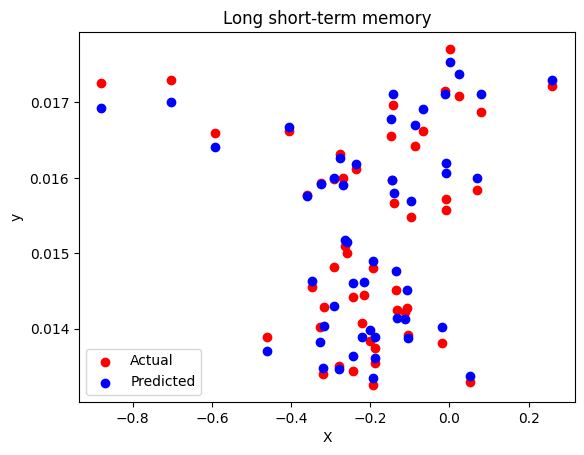

In [146]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae=mean_absolute_error(y_test,y_pred)
mape=mean_absolute_percentage_error(y_test,y_pred)
print("Mean Squared Error:", mse)
print("Mean aboslute Error:", mae)
print("Mean absolute percentage Error:", mape)
xtes=X_test[:,6]
print(xtes.shape)
print(y_test.shape)
# Plot the results
plt.scatter(xtes, y_test, color='red', label='Actual')
plt.scatter(xtes, y_pred, color='blue', label='Predicted')
plt.title('Long short-term memory')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

7.RNN

In [147]:
import tensorflow as tf
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Prepare the data
x = ws[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Underlying Log Returns (C)', 'Previous Day Underlying Volatility (D)']]
y = ws['Current Day Underlying Daily Volatility (E)']

# Scale the data
scaler = MinMaxScaler(feature_range=(-1, 1))
scaled_data = scaler.fit_transform(x)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(scaled_data, y, test_size=0.2, random_state=100)

# Create the RNN model
model = tf.keras.Sequential([
    tf.keras.layers.RNN(tf.keras.layers.SimpleRNNCell(64), return_sequences=True, input_shape=(X_train.shape[1], 1)),
    tf.keras.layers.RNN(tf.keras.layers.SimpleRNNCell(32)),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32)

# Make predictions on the test data
y_pred = model.predict(X_test)


Epoch 1/100
7/7 [==============================] - 4s 12ms/step - loss: 0.0915
Epoch 2/100
7/7 [==============================] - 0s 11ms/step - loss: 0.0217
Epoch 3/100
7/7 [==============================] - 0s 12ms/step - loss: 0.0143
Epoch 4/100
7/7 [==============================] - 0s 11ms/step - loss: 0.0072
Epoch 5/100
7/7 [==============================] - 0s 15ms/step - loss: 0.0040
Epoch 6/100
7/7 [==============================] - 0s 12ms/step - loss: 0.0021
Epoch 7/100
7/7 [==============================] - 0s 10ms/step - loss: 0.0011
Epoch 8/100
7/7 [==============================] - 0s 11ms/step - loss: 8.6846e-04
Epoch 9/100
7/7 [==============================] - 0s 10ms/step - loss: 6.0733e-04
Epoch 10/100
7/7 [==============================] - 0s 10ms/step - loss: 4.5927e-04
Epoch 11/100
7/7 [==============================] - 0s 14ms/step - loss: 3.8932e-04
Epoch 12/100
7/7 [==============================] - 0s 14ms/step - loss: 3.4779e-04
Epoch 13/100
7/7 [===========

Mean Squared Error: 3.8058126531466525e-05
Mean aboslute Error: 0.004933850844350445
Mean absolute percentage Error: 0.3164232693093356
(50,)
(50,)


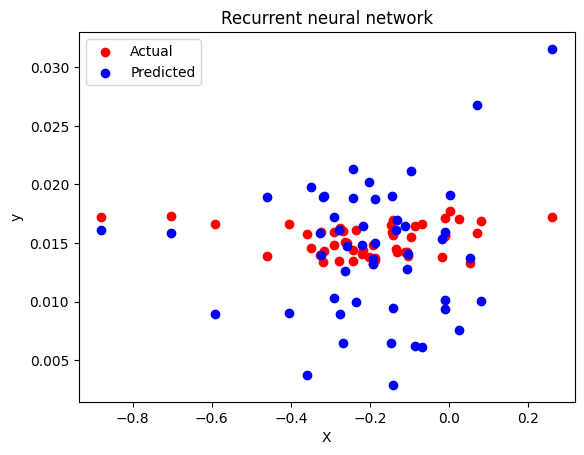

In [148]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae=mean_absolute_error(y_test,y_pred)
mape=mean_absolute_percentage_error(y_test,y_pred)
print("Mean Squared Error:", mse)
print("Mean aboslute Error:", mae)
print("Mean absolute percentage Error:", mape)
xtes=X_test[:,6]
print(xtes.shape)
print(y_test.shape)
# Plot the results
plt.scatter(xtes, y_test, color='red', label='Actual')
plt.scatter(xtes, y_pred, color='blue', label='Predicted')
plt.title('Recurrent neural network')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()